# View Filters from Inception V3

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf

In [2]:
# To avoid: 
# StdErr from Kernel Process OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5 already initialized. 
# OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program.

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
model = InceptionV3()
layers = model.layers

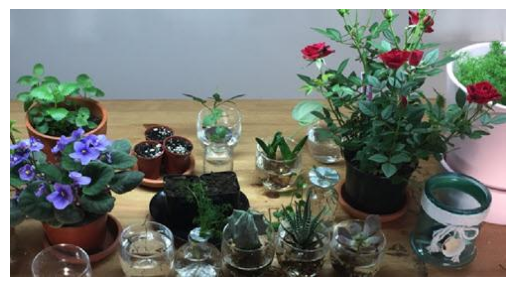

In [4]:
roses = cv.imread("../data/roses.jpg")
roses = cv.cvtColor(roses, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(roses)
plt.axis("off")
plt.show()

The weights property of a layer contains that layer's weights. Weights are learned during training.
Since Inception V3 is a pretrained network, it has already learned weights that will find useful features. We will inspect these weights in more detail.

In [5]:
conv_layer = layers[1]
W = conv_layer.weights[0]

The weights of the first convolution layer is an array sized 3-by-3-by-3-by-32. This means that there are 32 different filters. Each of those filters is 3-by-3-by-3, so we can view them as RGB images.
These filters need to be normalized so they can be displayed correctly. We can scale the weights to be between 0 and 1.

In [6]:
W_normalized = (W - tf.math.reduce_min(W)) / (tf.math.reduce_max(W) - tf.math.reduce_min(W))

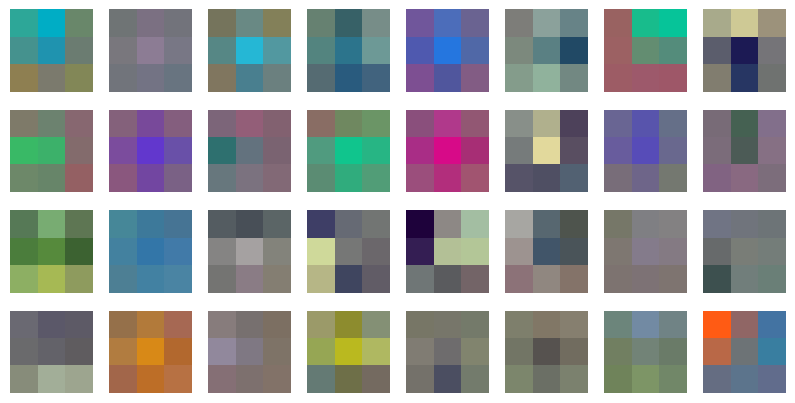

In [7]:
fig, axs = plt.subplots(4, 8, figsize=(10, 5))
k = 0
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(W_normalized[:, :, :, k])
        axs[i, j].axis("off")
        k += 1

plt.show()

We can view a specific filter by indexing into the weights. We need all rows, columns, and RGB values of a specific filter number.

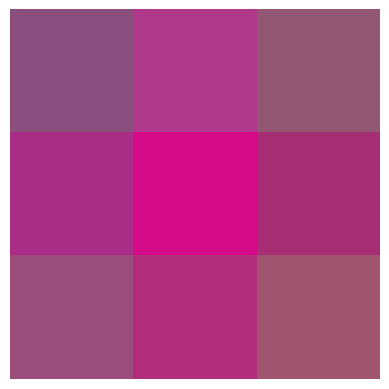

In [8]:
plt.figure()
plt.imshow(W_normalized[:, :, :, 12])
plt.axis("off")
plt.show()

The thirteenth filter seems to be looking for the color pink. The image roses.jpg contains a few plants, but only the roses are red. This means that only the roses should be positively activated from the thirteenth filter.
We can test this by getting the output of the convolution layer.

In [9]:
roses_conv = conv_layer(tf.expand_dims(roses.astype(float), axis=0))

The activations are size m-by-n-by-32. There is one activation, or feature, for every filter in the first convolution layer.
To investigate the thirteenth filter, we need to get the thirteenth activation channel.

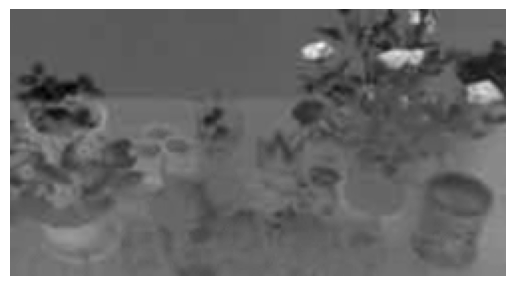

In [10]:
roses_conv_12 = roses_conv[0, :, :, 12]
roses_conv_12_normalized = (roses_conv_12 - tf.math.reduce_min(roses_conv_12)) / (tf.math.reduce_max(roses_conv_12) - tf.math.reduce_min(roses_conv_12))

plt.figure()
plt.imshow(roses_conv_12_normalized, cmap='gray')
plt.axis("off")
plt.show()